In [1]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.mlab
from shapely.geometry import Polygon
#import seaobs.geometry as geom
import cartopy.crs as ccrs
import glob
import numpy as np
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (10, 10)
#matplotlib.rcParams['xtick.labelsize'] = 30
#matplotlib.rcParams['ytick.labelsize'] = 30
#matplotlib.rcParams['axes.labelsize'] = 30
#matplotlib.rcParams['axes.titlesize'] = 24
#matplotlib.rcParams['axes.labelsize'] = 20

In [37]:
%run plot.py
%run swot.py

<Figure size 432x288 with 0 Axes>

# Open M2 dataset estimated from altimetry 

In [3]:
M2_ray_2016 = xr.open_dataset('/data/OBS/AVISO/M2_TIDE/rray.nc').\
              rename({'NbLatitudes': 'lat', 'NbLongitudes': 'lon',
                      'Grid_0001': 'M2_re', 'Grid_0002': 'M2_im',
                      'Grid_0003': 'M2_amp', 'Grid_0004': 'M2_phase'})
print(M2_ray_2016)

<xarray.Dataset>
Dimensions:     (LatLon: 2, lat: 2201, lon: 7200)
Coordinates:
  * lat         (lat) float64 -50.0 -49.95 -49.9 -49.85 ... 59.9 59.95 60.0
  * lon         (lon) float64 0.0 0.05 0.1 0.15 0.2 ... 359.8 359.9 359.9 360.0
  * LatLon      (LatLon) float64 0.0 1.0
Data variables:
    LatLonMin   (LatLon) float64 ...
    LatLonStep  (LatLon) float64 ...
    M2_re       (lon, lat) float32 ...
    M2_im       (lon, lat) float32 ...
    M2_amp      (lon, lat) float32 ...
    M2_phase    (lon, lat) float32 ...
Attributes:
    FileType:     GRID_DOTS
    description:  RRay internal tide model data conversion to nc, it_m2_14121...
    history:      Created Mon May 23 17:27:08 2016
    author:       Romain Baghi - CLS (contact:rbaghi@cls.fr)


# Open EKE from AVISO

In [4]:
EKE_AVISO = xr.open_dataset("/data/OBS/AVISO/EKE/eke.nc").rename({'NbLatitudes': 'lat', 'NbLongitudes': 'lon', 'Grid_0001': 'EKE'})
print(EKE_AVISO)

<xarray.Dataset>
Dimensions:     (LatLon: 2, lat: 720, lon: 1440)
Coordinates:
  * LatLon      (LatLon) float64 0.0 1.0
  * lat         (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon         (lon) float64 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    LatLonMin   (LatLon) float64 ...
    LatLonStep  (LatLon) float64 ...
    EKE         (lon, lat) float32 ...
Attributes:
    FileType:                  GRID_DOTS
    OriginalName:              dt_global_allsat_msla_eke_y1993_2012_m01_03.nc
    CreatedBy:                 SSALTO/DUACS
    title:                     SSALTO/DUACS - DT MSLA - Merged Product - Up-t...
    years:                     1993-2012
    months:                    01-03
    origin:                    created from daily Eddy kinetic energy maps
    institution:               CLS
    history:                   Fri Feb  2 11:08:04 2018: ncea dt_global_allsa...
    NCO:                       "4.5.4"
    nco_openmp_thread_number:  

# Define the regions of study relative to internal tides and Kinetic Energy

In [5]:
poly_eastern_ecc = Polygon([[169, -20.5], [169, -24], [180, -24], [180, -20.5]])
poly_vanuatu = Polygon([[169, -20], [166, -20], [162, -18], [162, -12], [166, -12], [166, -15]])
poly_vauban = Polygon([[167.1, -22], [165.5, -21], [164.5, -20], [165.5, -20], [167, -21], [168.5, -22]])
poly_scj = Polygon([[162, -23], [171, -23], [171, -27], [162, -27]])
regions = [poly_vauban, poly_eastern_ecc, poly_vanuatu, poly_scj]

No handles with labels found to put in legend.
/Users/serazin/OneDrive - UNSW/Code/serazin2018/code/plot.py:73: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  
/Users/serazin/anaconda3/envs/jplab/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/serazin/anaconda3/envs/jplab/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


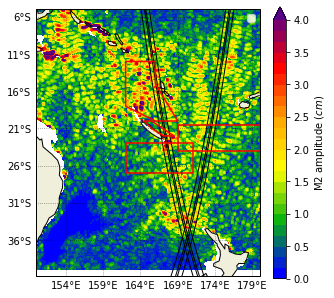

In [24]:
plt.figure(figsize=(5, 5))
plot_regions(regions, facecolor='none', edgecolor='red', lw=1.5, alpha=1)
plot_M2(M2_ray_2016['M2_amp'], vmax=4)
add_swot_swath(edgecolor='black', facecolor='none', lw=1)
add_swot_swath(pass_number=19, edgecolor='black', facecolor='none', lw=1)
plt.savefig('../Figures/1b_M2_tide_SSH_Coral_sea.png', dpi=300, bbox_inches='tight')

No handles with labels found to put in legend.


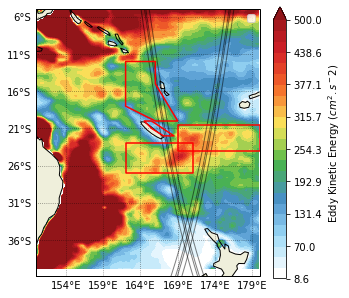

In [26]:
plt.figure(figsize=(5, 5))
plot_regions(regions, facecolor='none', edgecolor='red', lw=1.5, alpha=1)
plot_EKE(EKE_AVISO['EKE'], vmax=500, levels=25)
add_swot_swath(edgecolor='black', facecolor='none', lw=1, alpha=0.5)
add_swot_swath(pass_number=19, edgecolor='black', facecolor='none', lw=1, alpha=0.5)
plt.savefig('../Figures/1a_AVISO_EKE_Coral_Sea.png', dpi=300, bbox_inches='tight')

No handles with labels found to put in legend.
/Users/serazin/OneDrive - UNSW/Code/serazin2018/code/plot.py:73: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


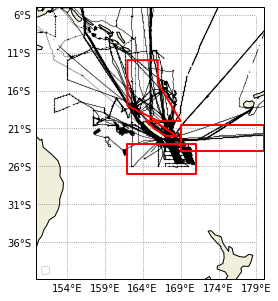

In [35]:
plt.figure(figsize=(5, 5))
list_of_files = glob.glob("/data/OBS/ADCP/CLEAN/*.nc")
plot_regions(regions, facecolor='none', alpha=1)
plot_transect(list_of_files, markersize=0.05)
plt.savefig('../Figures/1c_ADCP_sections.png', dpi=300,  bbox_inches='tight')

No handles with labels found to put in legend.
/Users/serazin/OneDrive - UNSW/Code/serazin2018/code/plot.py:73: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/Users/serazin/anaconda3/envs/jplab/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  inframe=inframe)
/Users/serazin/anaconda3/envs/jplab/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  """
/Users/serazin/anaconda3/envs/jplab/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


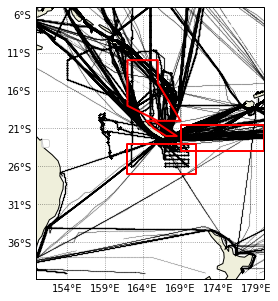

In [38]:
plt.figure(figsize=(5, 5))
list_of_files = glob.glob("/data/OBS/TSG/LEGOS_CLEAN/*.nc")
plot_regions(regions, facecolor='none', alpha=1)
plot_transect(list_of_files, lon_name='lon', lat_name='lat', markersize=0.05)
plt.savefig('../Figures/1d_TSG_sections.png', dpi=300, bbox_inches='tight')

In [42]:
%%system
convert ../Figures/1a_AVISO_EKE_Coral_Sea.png -trim -bordercolor White -border 20x10 +repage ../Figures/temp1.png
convert ../Figures/1b_M2_tide_SSH_Coral_sea.png -trim -bordercolor White -border 20x10 +repage ../Figures/temp2.png
convert ../Figures/1c_ADCP_sections.png -trim -bordercolor White -border 20x10 +repage ../Figures/temp3.png
convert ../Figures/1d_TSG_sections.png -trim -bordercolor White -border 20x10 +repage ../Figures/temp4.png
#montage Figures/1*.png -geometry +0+0  Figures/Fig_1-regions_of_study.jpg
montage ../Figures/temp*.png -geometry 1024x1024 -tile 2x2 -quality 100 ../Figures/Fig_1-regions_of_study.png
rm ../Figures/temp*.png

[]

In [46]:
%%system 
ls

['compute_structure_functions.ipynb',
 'Define_regions_of_study.ipynb',
 'Figures',
 'plot.py',
 'Prepare_ADCP_data.ipynb',
 'structfunc.py']